In [7]:
from pylab import *
from numba import njit
from scipy.special import *

In [2]:
@njit
def raiz_newton(num, error = 1e-8):
    x0 , diferencia = num , 1 
    while diferencia > error:
        x_old = x0
        x0 = 0.5*(x0 + num/x0)
        diferencia = abs(x0 - x_old) 
    return x0

In [3]:
%%timeit
raiz_newton(57)

136 ns ± 0.269 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [4]:
raiz_newton(57)

7.54983443527075

In [5]:
%%timeit
sqrt(57)

418 ns ± 0.837 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [6]:
sqrt(57)

7.54983443527075

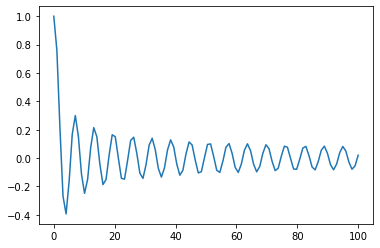

In [16]:
x = linspace(0,100,100)
y = jv(0,x)
plot(x,y)
show()

In [17]:
def todos_zeros():
    
    return

IndentationError: expected an indented block (3652643202.py, line 1)

In [19]:
a = []
a

[]

In [23]:
a.append(53)
a

[5, 9, 13, 53]